21112010<br>
Gulafshan<br>
LAB-1<br>
SEM -4<br>

**AIM**<br>
-To perform EDA and do perform data transformation and analysis and feauture engineering
also to clean the webscrapped data for comprehensible understanding and transformation<br>

**OBJECTIVE**<br>
1. *Create a well-formatted Jupyter Notebook Document to present your       findings (2 marks), and create a short description about the dataset (1 Mark)*

1. *Illustrate Feature Scaling, Encoding/Transformation, Engineering, Generation, using the existing set of features in the dataset, and prepare it for Model Building (3 Marks)*

1. *Perform Statistical Data Analysis on the Dataset, and present your observations (3 Marks)*

1. *Extend your Exploratory Data Analysis (EDA) to different problem statements, and find solutions to at least six formulated questions (3 Marks)*

1. *Prepare your Dataset for applying Linear Regression Model, by making use of "Price" as the target variable. Export the prepared dataset, and upload the same along with the submission(3 Marks)*<br>
<br>

**APPROACH**<br>
1)Data Cleaning<br>
2)Data Manipulation<br>
3)Data Transformation<br>
4)Feature Enginnering and Scaling <br>
5)Linear Regression Model Building<br>
6)Exploratory Data Analysis<br>

**PROBLEM STATEMENT**<br>
To clean and assort to visualise and depict the data for comprehensive insight deductions 


**OBSERVATIONS**<br>
ALL OBSERVATIONS HAVE BEEN SUBSEQUENTLY ADDED WITH EACH PLOT

**COMPLETION**
- **All Done**



**Importing Libraries**

In [27]:
import pandas as pd
import matplotlib as mb
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_excel("C:/Users/GULAFSHAN/Downloads/Lab01_Dataset (1).xlsx")

In [7]:
display(df.head())

display(df.tail())

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner


,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners
4335,Hyundai EON Era,9,362500.0,16000,Petrol,Broker,Manual,First Owner
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.0,54000,Petrol,Direct Owner,Manual,First Owner
4337,Maruti Ritz LXi,7,343750.0,164000,Petrol,Direct Owner,Manual,First Owner
4338,Honda Amaze VX Diesel BSIV,5,975000.0,36114,Diesel,Broker,Manual,First Owner
4339,Honda Brio VX,9,431250.0,62000,Petrol,Broker,Manual,First Owner


# **Analysis**

In [8]:
df.columns = df.columns.str.replace("Unnamed: 4", "FuelType")
display(df.head())

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,DealingType,GearSystem,NoOfOwners
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner


In [5]:
print("Shape of The Dataset: ",df.shape)

Shape of The Dataset:  (4340, 8)


In [6]:
display(df.isnull().sum())

CarModel           0
AgeOfCar           0
Price              0
OdoMeterReading    0
Unnamed: 4         0
DealingType        0
GearSystem         0
NoOfOwners         0
dtype: int64

In [9]:
display(df.describe())

,AgeOfCar,Price,OdoMeterReading
count,4340.000000,4.340000e+03,4340.000000
mean,9.909217,6.301591e+05,70215.777419
std,4.215344,7.231859e+05,46644.102194
min,3.000000,2.500000e+04,4001.000000
25%,7.000000,2.609372e+05,39000.000000
50%,9.000000,4.375000e+05,64000.000000
75%,12.000000,7.500000e+05,94000.000000
max,31.000000,1.112500e+07,810599.000000


In [10]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CarModel         4340 non-null   object 
 1   AgeOfCar         4340 non-null   int64  
 2   Price            4340 non-null   float64
 3   OdoMeterReading  4340 non-null   int64  
 4   FuelType         4340 non-null   object 
 5   DealingType      4340 non-null   object 
 6   GearSystem       4340 non-null   object 
 7   NoOfOwners       4340 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 271.4+ KB


None

In [11]:
display(df.nunique())

CarModel           1491
AgeOfCar             27
Price               445
OdoMeterReading     770
FuelType              5
DealingType           3
GearSystem            2
NoOfOwners            5
dtype: int64

In [12]:
count_row = df.shape[0]
count_col = df.shape[1]
print("Total Rows: ", count_row)
print("Total Columns:", count_col)
print("*"*25)

Total Rows:  4340
Total Columns: 8
*************************


In [13]:
display(df.isnull().sum())

CarModel           0
AgeOfCar           0
Price              0
OdoMeterReading    0
FuelType           0
DealingType        0
GearSystem         0
NoOfOwners         0
dtype: int64

In [14]:
#Checking for dupicate values
display(df.nunique())

CarModel           1491
AgeOfCar             27
Price               445
OdoMeterReading     770
FuelType              5
DealingType           3
GearSystem            2
NoOfOwners            5
dtype: int64

In [15]:
display(df.max())

CarModel           Volvo XC60 D5 Inscription
AgeOfCar                                  31
Price                             11125000.0
OdoMeterReading                       810599
FuelType                              Petrol
DealingType                 Trustmark Broker
GearSystem                            Manual
NoOfOwners                       Third Owner
dtype: object

In [17]:
display(df.columns)

Index(['CarModel', 'AgeOfCar', 'Price', 'OdoMeterReading', 'FuelType',
       'DealingType', 'GearSystem', 'NoOfOwners'],
      dtype='object')

In [20]:
display(df['CarModel'].value_counts())

Maruti Swift Dzire VDI                          69
Maruti Alto 800 LXI                             59
Maruti Alto LXi                                 47
Maruti Alto LX                                  35
Hyundai EON Era Plus                            35
                                                ..
Maruti Ertiga VDI Limited Edition                1
Maruti Swift Dzire Tour LDI                      1
Skoda Octavia Ambiente 1.9 TDI MT                1
Skoda Rapid 1.6 MPI Active                       1
Ford EcoSport 1.5 TDCi Titanium Plus BE BSIV     1
Name: CarModel, Length: 1491, dtype: int64

In [21]:
display(df['FuelType'].value_counts())

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: FuelType, dtype: int64

In [22]:
display(df['NoOfOwners'].value_counts())

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: NoOfOwners, dtype: int64

In [23]:
display(df['GearSystem'].value_counts())

Manual       3892
Automatic     448
Name: GearSystem, dtype: int64

In [24]:
display(df['DealingType'].value_counts())

Direct Owner        3244
Broker               994
Trustmark Broker     102
Name: DealingType, dtype: int64

# **Transformation**

**Feature Engineering**

In [30]:
label_encoder =preprocessing.LabelEncoder()

df['Encoded_FuelType'] = label_encoder.fit_transform(df['FuelType'])

df['Encoded_DealingType'] = label_encoder.fit_transform(df['DealingType'])

df['Encoded_GearSystem'] = label_encoder.fit_transform(df['GearSystem'])
print("-"*25)
display(df['GearSystem'].unique())
display(df['Encoded_GearSystem'].unique())
print("-"*25)

display(df['DealingType'].unique())
display(df['Encoded_DealingType'].unique())
print("-"*25)

display(df['FuelType'].unique())

display(df['Encoded_FuelType'].unique())

-------------------------


array(['Manual', 'Automatic'], dtype=object)

array([1, 0])

-------------------------


array(['Broker', 'Direct Owner', 'Trustmark Broker'], dtype=object)

array([0, 1, 2])

-------------------------


array(['Diesel', 'Petrol', 'CNG', 'Electric', 'LPG'], dtype=object)

array([1, 4, 0, 2, 3])

In [31]:
encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df[['NoOfOwners']]).toarray())
encoder_df.rename(columns = {1: "Fuel_Diesel", 4:"Fuel_Petrol", 0: "Fuel_CNG", 2:"Fuel_Electric", 3:"Fuel_LPG"}, inplace = True)

encoded_df = df.join(encoder_df)
display(encoded_df.head())

,CarModel,AgeOfCar,Price,OdoMeterReading,FuelType,DealingType,GearSystem,NoOfOwners,Encoded_FuelType,Encoded_DealingType,Encoded_GearSystem,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner,1,0,1,1.0,0.0,0.0,0.0,0.0
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner,1,1,1,1.0,0.0,0.0,0.0,0.0
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner,1,1,1,1.0,0.0,0.0,0.0,0.0
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner,4,1,0,0.0,0.0,0.0,0.0,1.0
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner,1,1,1,1.0,0.0,0.0,0.0,0.0


# **Linear Regression Model**

In [32]:
data = encoded_df
data = data.drop(['CarModel','FuelType',
       'DealingType', 'GearSystem', 'NoOfOwners'], axis = 1)

In [33]:
display(data.head())

,AgeOfCar,Price,OdoMeterReading,Encoded_FuelType,Encoded_DealingType,Encoded_GearSystem,Fuel_CNG,Fuel_Diesel,Fuel_Electric,Fuel_LPG,Fuel_Petrol
0,8,574998.75,152620,1,0,1,1.0,0.0,0.0,0.0,0.0
1,11,656250.00,149000,1,1,1,1.0,0.0,0.0,0.0,0.0
2,9,250000.00,104000,1,1,1,1.0,0.0,0.0,0.0,0.0
3,13,437500.00,84000,4,1,0,0.0,0.0,0.0,0.0,1.0
4,12,225000.00,124000,1,1,1,1.0,0.0,0.0,0.0,0.0


In [34]:
y = data['Price']

X = data.drop('Price', axis = 1)

X= data.drop('Price', 1)
Y= data.Price

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [36]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = lm.predict(X_test)
print(r2_score(y_true=y_test, y_pred = y_pred))

0.4433208986398238


**Min_Max Scaling**

In [15]:
#Feature scaling for Age of car
scaler_age = StandardScaler()
scaler_age.fit(df[['AgeOfCar']])
scaler_age.transform(df[['AgeOfCar']])

array([[-0.4529729 ],
       [ 0.2587948 ],
       [-0.215717  ],
       ...,
       [-0.69022881],
       [-1.16474061],
       [-0.215717  ]])

In [16]:
df.AgeOfCar

0        8
1       11
2        9
3       13
4       12
        ..
4335     9
4336     6
4337     7
4338     5
4339     9
Name: AgeOfCar, Length: 4340, dtype: int64

**Feature Scaling for Price<br>**

In [17]:
scaler_price = StandardScaler()
scaler_price.fit(df[['Price']])
scaler_price.transform(df[['Price']])

array([[-0.07628294],
       [ 0.03608182],
       [-0.52573333],
       ...,
       [-0.39608368],
       [ 0.47689064],
       [-0.27507734]])

**Feature scaling for Odometer Reading<br>**

In [18]:
scaler_omr = StandardScaler()
scaler_omr.fit(df[['OdoMeterReading']])
scaler_omr.transform(df[['OdoMeterReading']])

array([[ 1.76686256],
       [ 1.68924466],
       [ 0.7243813 ],
       ...,
       [ 2.01086578],
       [-0.73119012],
       [-0.17615784]])

**ENCODING/TRANSFORMATION**


ENCODING AND TRANSFORMATION

In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['GearSystem_LE']= le.fit_transform(df['GearSystem'])

df['GearSystem_LE'].unique()



array([1, 0])

In [20]:
df

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners,GearSystem_LE
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner,1
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner,1
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner,1
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner,0
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner,1
...,...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner,1
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner,1
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner,1
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner,1


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df['DealingType_LE']= le.fit_transform(df['DealingType'])

df['DealingType_LE'].unique()


array([0, 1, 2])

In [22]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['']

KeyError: ''

**GENERATION**

In [ ]:
df['price_age_correlation']=df['Price'] /df['AgeOfCar']

In [ ]:

df

*LINEAR REGRESSION MODEL*


In [ ]:
#IMPORTING REQUIRED LIBRARIES

In [ ]:
df.info()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
X = df[['AgeOfCar','OdoMeterReading','GearSystem_LE','price_age_correlation']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
y_pred = linear_regressor.predict(X_test)
r2_score(y_test, y_pred)


*EXPLOARATORY DATA ANALYSIS*<br>

In [23]:
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
import plotly.express as plt

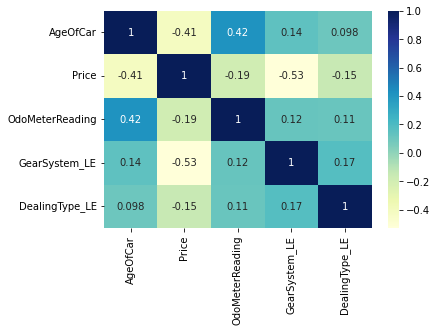

In [24]:
#How can the above data be visualised alltogethr to give a gist of correlation between the elements
dataplot = sns.heatmap(df.corr(),cmap="YlGnBu",annot=True)


*observatiions<br>*
1)We can observe that price and age are almost a perfect correlation<br> 
2)we can  note that odometer reading and age of car are moderately related<br>
3)we can see that there is almost moderate relationship between gearsystem and price of a car<br>
4)we can see that there almost negliible relationship between DealingType and age of car<br>

In [40]:
#Do people prefer owning pre-owned cars or new cars?
fig = plt.pie(df,'NoOfOwners')
fig.show()

*OBSERVARTION*<BR>
    1)Majority of the cars are first hand and quater of the rest are second hand cars<br>
    2)A very small population of cars are 4th owner and abve<br>
    3)A negligble population have owned a test drive car<br>
    4)A vast majority of people like owning a new car over apre-owned one<br>

In [26]:
#which fuel is the most used one?

fig =plt.bar(df,x='Unnamed: 4')
fig.show()

*OBSERVATION*<br>
1)Majority of the cars are diesel based and very high majority which is almost equilvant to diesel baseed cars are petrol based as well<br>
2)There is a negligble amount of cars running on renewable energy hence proving automobiles are not eco-friendly for the planet
3)There are no cars no running on Electrity

In [27]:
#What is The relationship between AGE of car and Number of OWNERS?
fig = plt.box(df,x='NoOfOwners',y='AgeOfCar')
fig.show()

*OBSERVATION*<br>
1)We can observe that as number of owners increase so does the age of car implying that age of car and the number of owners are directly proportional<br>
2)There is high quantity of outliers<br>
3)the realtioship between age of car and test drive car is almost negligle and tending towards non-existent<br>

In [28]:
#Q5)what is the relationship between age of car and dealing type?
fig = plt.scatter(df,y='AgeOfCar',x='DealingType')
fig.show()

*OBSERVATIONS*<br>
1)We can observe that trustmark brokership cars are very new and their age is less than  decade<br>
2)We can observe that the cars sold by Brokers have at least 2 decades and still runnning<br>
3)We can observe that the cars which are directly owned by the owner have the maximum life<br>

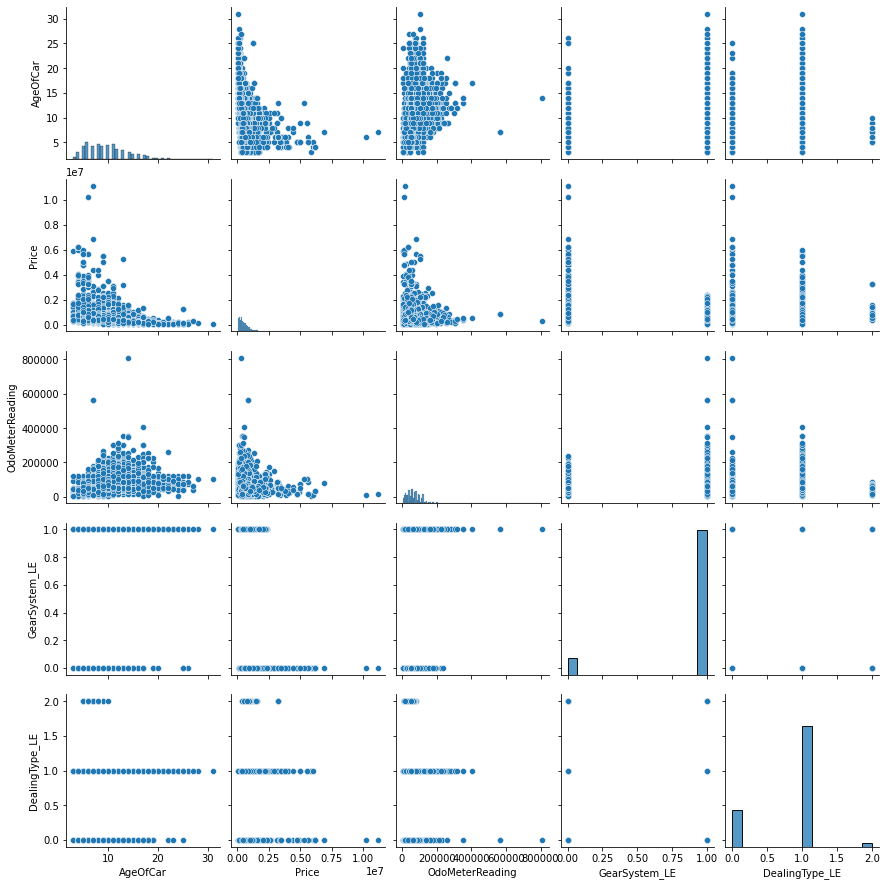

In [29]:
#visualise all of the above data in maps for comprehensible interpretation
a=sns.pairplot(df)


In [31]:
df.to_csv("C:/Users/GULAFSHAN/Downloads/Lab01Final")

In [32]:
df.to_csv("C:/Users/GULAFSHAN/Downloads/Lab01Final")

In [39]:
df2= pd.read_csv("C:/Users/GULAFSHAN/Downloads/Lab01Final")

In [36]:
df

,CarModel,AgeOfCar,Price,OdoMeterReading,Unnamed: 4,DealingType,GearSystem,NoOfOwners,GearSystem_LE,DealingType_LE
0,Ford Figo Aspire 1.5 TDCi Trend,8,574998.75,152620,Diesel,Broker,Manual,First Owner,1,0
1,Mahindra Scorpio SLE BSIV,11,656250.00,149000,Diesel,Direct Owner,Manual,First Owner,1,1
2,Tata Manza Club Class Quadrajet90 LS,9,250000.00,104000,Diesel,Direct Owner,Manual,First Owner,1,1
3,Toyota Corolla Altis 1.8 VL AT,13,437500.00,84000,Petrol,Direct Owner,Automatic,Third Owner,0,1
4,Tata Indigo CS eLS BS IV,12,225000.00,124000,Diesel,Direct Owner,Manual,First Owner,1,1
...,...,...,...,...,...,...,...,...,...,...
4335,Hyundai EON Era,9,362500.00,16000,Petrol,Broker,Manual,First Owner,1,0
4336,Hyundai Grand i10 1.2 Kappa Asta,6,625000.00,54000,Petrol,Direct Owner,Manual,First Owner,1,1
4337,Maruti Ritz LXi,7,343750.00,164000,Petrol,Direct Owner,Manual,First Owner,1,1
4338,Honda Amaze VX Diesel BSIV,5,975000.00,36114,Diesel,Broker,Manual,First Owner,1,0
